In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd

In [22]:
plt.rcParams["figure.figsize"] = (20, 10)

In [23]:
s_weather_df = pd.read_csv('SWeather2018.csv', sep=';', decimal=',')
pd.options.display.max_rows = 20
display(s_weather_df)

,Datum,MedTemp,MaxTemp,MinTemp,Niederschlag,Monat,MedGlobalstrahlung,MedStarhlungBilanz
0,01.01.2014,6.2,9.8,2.4,0.00,1.0,44.9,-17.8
1,02.01.2014,7.0,10.0,4.8,1.60,1.0,24.3,-37.1
2,03.01.2014,7.8,10.8,4.3,0.30,1.0,22.4,-35.1
3,04.01.2014,7.7,9.7,5.6,1.33,1.0,11.9,-31.8
4,05.01.2014,5.8,8.6,1.4,0.72,1.0,29.1,-41.2
...,...,...,...,...,...,...,...,...
1885,01.03.2019,9.2,11.9,7.6,5.60,3.0,51.9,-1.5
1886,02.03.2019,9.2,12.3,7.1,0.00,3.0,54.0,16.4
1887,03.03.2019,11.1,13.6,7.7,0.00,3.0,59.6,11.6
1888,04.03.2019,9.9,14.3,4.8,4.40,3.0,72.0,-0.6


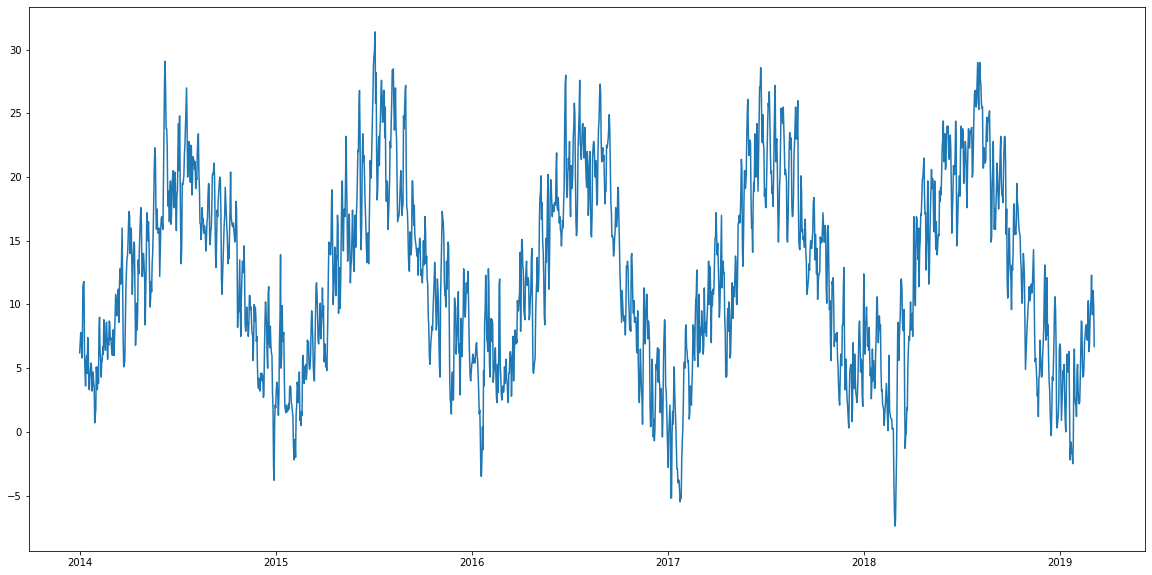

<Figure size 1440x720 with 0 Axes>

In [24]:
med_temp = s_weather_df['MedTemp']
dates = np.arange('2014-01-01', '2019-03-06', dtype='datetime64[D]')
plt.plot(dates, med_temp)
plt.show()
plt.savefig('stuttgart_history.pdf')

In [25]:
s = s_weather_df['MedTemp']

In [26]:
lastN = 3
until = 6
cols = [1, 2, 3, 4, 5, 6, 7]

x = []
for i in range(lastN, s.size):
    x_inputs = []
    for j in cols:
        for k in range(i - lastN, i):
            x_inputs.append(s_weather_df.iloc[k, j])
    x.append(x_inputs)

y = []
for i in range(lastN, s.size):
    y.append([s_weather_df.iloc[i, 1]])

for i in range(len(x)):    
    print(i, x[i], y[i])

0 [6.2, 7.0, 7.8, 9.8, 10.0, 10.8, 2.4, 4.8, 4.3, 0.0, 1.6, 0.3, 1.0, 1.0, 1.0, 44.9, 24.3, 22.4, -17.8, -37.1, -35.1] [7.7]
1 [7.0, 7.8, 7.7, 10.0, 10.8, 9.7, 4.8, 4.3, 5.6, 1.6, 0.3, 1.33, 1.0, 1.0, 1.0, 24.3, 22.4, 11.9, -37.1, -35.1, -31.8] [5.8]
2 [7.8, 7.7, 5.8, 10.8, 9.7, 8.6, 4.3, 5.6, 1.4, 0.3, 1.33, 0.72, 1.0, 1.0, 1.0, 22.4, 11.9, 29.1, -35.1, -31.8, -41.2] [7.1]
3 [7.7, 5.8, 7.1, 9.7, 8.6, 12.2, 5.6, 1.4, 1.0, 1.33, 0.72, 0.0, 1.0, 1.0, 1.0, 11.9, 29.1, 33.8, -31.8, -41.2, -10.0] [11.4]
4 [5.8, 7.1, 11.4, 8.6, 12.2, 14.5, 1.4, 1.0, 7.6, 0.72, 0.0, 0.0, 1.0, 1.0, 1.0, 29.1, 33.8, 27.1, -41.2, -10.0, -15.1] [11.7]
5 [7.1, 11.4, 11.7, 12.2, 14.5, 15.9, 1.0, 7.6, 8.6, 0.0, 0.0, 0.09, 1.0, 1.0, 1.0, 33.8, 27.1, 39.8, -10.0, -15.1, -23.1] [11.8]
6 [11.4, 11.7, 11.8, 14.5, 15.9, 17.1, 7.6, 8.6, 6.7, 0.0, 0.09, 4.05, 1.0, 1.0, 1.0, 27.1, 39.8, 45.7, -15.1, -23.1, -15.9] [6.1]
7 [11.7, 11.8, 6.1, 15.9, 17.1, 9.6, 8.6, 6.7, 2.5, 0.09, 4.05, 2.1, 1.0, 1.0, 1.0, 39.8, 45.7, 41.4, -23.1

428 [4.9, 5.1, 6.1, 8.3, 11.6, 13.0, 2.9, 0.0, -0.1, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 104.1, 135.2, 131.3, 31.2, 23.1, 14.1] [8.3]
429 [5.1, 6.1, 8.3, 11.6, 13.0, 17.5, 0.0, -0.1, 1.2, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 135.2, 131.3, 145.6, 23.1, 14.1, 19.0] [9.5]
430 [6.1, 8.3, 9.5, 13.0, 17.5, 19.0, -0.1, 1.2, 2.6, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 131.3, 145.6, 164.6, 14.1, 19.0, 26.4] [8.6]
431 [8.3, 9.5, 8.6, 17.5, 19.0, 14.9, 1.2, 2.6, 2.8, 0.0, 0.0, 0.33, 3.0, 3.0, 3.0, 145.6, 164.6, 114.8, 19.0, 26.4, 26.0] [7.3]
432 [9.5, 8.6, 7.3, 19.0, 14.9, 10.9, 2.6, 2.8, 1.9, 0.0, 0.33, 0.66, 3.0, 3.0, 3.0, 164.6, 114.8, 152.4, 26.4, 26.0, 35.2] [5.1]
433 [8.6, 7.3, 5.1, 14.9, 10.9, 11.0, 2.8, 1.9, -0.4, 0.33, 0.66, 0.0, 3.0, 3.0, 3.0, 114.8, 152.4, 132.4, 26.0, 35.2, 18.3] [4.3]
434 [7.3, 5.1, 4.3, 10.9, 11.0, 8.5, 1.9, -0.4, 0.2, 0.66, 0.0, 0.0, 3.0, 3.0, 3.0, 152.4, 132.4, 115.1, 35.2, 18.3, 15.9] [4.0]
435 [5.1, 4.3, 4.0, 11.0, 8.5, 7.2, -0.4, 0.2, -0.1, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 132.4, 115.1

761 [12.8, 11.2, 5.3, 14.2, 12.7, 7.7, 10.8, 7.9, 2.8, 0.0, 0.61, 2.44, 2.0, 2.0, 2.0, 26.6, 35.5, 40.0, 1.9, 2.2, -26.9] [4.3]
762 [11.2, 5.3, 4.3, 12.7, 7.7, 6.9, 7.9, 2.8, 2.5, 0.61, 2.44, 2.44, 2.0, 2.0, 2.0, 35.5, 40.0, 27.7, 2.2, -26.9, -20.6] [7.3]
763 [5.3, 4.3, 7.3, 7.7, 6.9, 11.3, 2.8, 2.5, 5.3, 2.44, 2.44, 1.78, 2.0, 2.0, 2.0, 40.0, 27.7, 68.2, -26.9, -20.6, -0.6] [8.9]
764 [4.3, 7.3, 8.9, 6.9, 11.3, 15.0, 2.5, 5.3, 4.6, 2.44, 1.78, 0.02, 2.0, 2.0, 2.0, 27.7, 68.2, 71.0, -20.6, -0.6, -12.3] [7.1]
765 [7.3, 8.9, 7.1, 11.3, 15.0, 10.2, 5.3, 4.6, 5.0, 1.78, 0.02, 0.0, 2.0, 2.0, 2.0, 68.2, 71.0, 28.4, -0.6, -12.3, -12.5] [8.8]
766 [8.9, 7.1, 8.8, 15.0, 10.2, 13.7, 4.6, 5.0, 6.0, 0.02, 0.0, 4.83, 2.0, 2.0, 2.0, 71.0, 28.4, 56.7, -12.3, -12.5, -17.8] [8.5]
767 [7.1, 8.8, 8.5, 10.2, 13.7, 12.3, 5.0, 6.0, 3.9, 0.0, 4.83, 10.66, 2.0, 2.0, 2.0, 28.4, 56.7, 24.4, -12.5, -17.8, -39.9] [3.9]
768 [8.8, 8.5, 3.9, 13.7, 12.3, 4.8, 6.0, 3.9, 2.5, 4.83, 10.66, 2.02, 2.0, 2.0, 2.0, 56.7, 24.4,

1095 [-1.7, -2.8, 0.0, 4.4, 2.4, 1.8, -5.1, -5.3, -3.4, 0.0, 0.0, 0.47, 12.0, 1.0, 1.0, 65.6, 53.1, 10.2, -38.6, -17.4, -11.1] [1.1]
1096 [-2.8, 0.0, 1.1, 2.4, 1.8, 3.5, -5.3, -3.4, -0.3, 0.0, 0.47, 0.0, 1.0, 1.0, 1.0, 53.1, 10.2, 29.3, -17.4, -11.1, -4.2] [2.1]
1097 [0.0, 1.1, 2.1, 1.8, 3.5, 3.5, -3.4, -0.3, 0.4, 0.47, 0.0, 0.56, 1.0, 1.0, 1.0, 10.2, 29.3, 13.0, -11.1, -4.2, -21.9] [0.2]
1098 [1.1, 2.1, 0.2, 3.5, 3.5, 2.5, -0.3, 0.4, -3.2, 0.0, 0.56, 0.0, 1.0, 1.0, 1.0, 29.3, 13.0, 28.5, -4.2, -21.9, -30.2] [-5.2]
1099 [2.1, 0.2, -5.2, 3.5, 2.5, 0.0, 0.4, -3.2, -8.7, 0.56, 0.0, 0.0, 1.0, 1.0, 1.0, 13.0, 28.5, 66.0, -21.9, -30.2, -46.8] [-5.2]
1100 [0.2, -5.2, -5.2, 2.5, 0.0, 0.0, -3.2, -8.7, -9.7, 0.0, 0.0, 0.27, 1.0, 1.0, 1.0, 28.5, 66.0, 37.4, -30.2, -46.8, -3.8] [-0.1]
1101 [-5.2, -5.2, -0.1, 0.0, 0.0, 1.7, -8.7, -9.7, -2.8, 0.0, 0.27, 1.73, 1.0, 1.0, 1.0, 66.0, 37.4, 4.7, -46.8, -3.8, -17.5] [1.6]
1102 [-5.2, -0.1, 1.6, 0.0, 1.7, 3.2, -9.7, -2.8, 0.0, 0.27, 1.73, 0.0, 1.0, 1.0, 1.

1428 [3.5, 2.5, 1.9, 6.2, 5.1, 3.4, 0.4, 0.4, 0.7, 0.5, 1.2, 0.8, 11.0, 11.0, 12.0, 16.8, 25.9, 20.1, -31.8, -18.7, -18.5] [1.0]
1429 [2.5, 1.9, 1.0, 5.1, 3.4, 2.6, 0.4, 0.7, -1.0, 1.2, 0.8, 0.0, 11.0, 12.0, 12.0, 25.9, 20.1, 12.3, -18.7, -18.5, -17.9] [0.3]
1430 [1.9, 1.0, 0.3, 3.4, 2.6, 1.7, 0.7, -1.0, -0.8, 0.8, 0.0, 0.4, 12.0, 12.0, 12.0, 20.1, 12.3, 23.4, -18.5, -17.9, 1.6] [2.9]
1431 [1.0, 0.3, 2.9, 2.6, 1.7, 5.3, -1.0, -0.8, 0.3, 0.0, 0.4, 0.4, 12.0, 12.0, 12.0, 12.3, 23.4, 7.3, -17.9, 1.6, -19.6] [4.8]
1432 [0.3, 2.9, 4.8, 1.7, 5.3, 6.2, -0.8, 0.3, 3.1, 0.4, 0.4, 0.0, 12.0, 12.0, 12.0, 23.4, 7.3, 16.9, 1.6, -19.6, -4.9] [5.1]
1433 [2.9, 4.8, 5.1, 5.3, 6.2, 6.3, 0.3, 3.1, 2.6, 0.4, 0.0, 0.0, 12.0, 12.0, 12.0, 7.3, 16.9, 8.8, -19.6, -4.9, -6.0] [5.3]
1434 [4.8, 5.1, 5.3, 6.2, 6.3, 10.1, 3.1, 2.6, 0.9, 0.0, 0.0, 0.0, 12.0, 12.0, 12.0, 16.9, 8.8, 58.7, -4.9, -6.0, -29.9] [4.8]
1435 [5.1, 5.3, 4.8, 6.3, 10.1, 8.5, 2.6, 0.9, 0.7, 0.0, 0.0, 2.1, 12.0, 12.0, 12.0, 8.8, 58.7, 32.5, -6.0

1761 [4.9, 6.0, 7.2, 6.6, 7.6, 8.3, 3.1, 4.5, 5.8, 17.5, 0.1, 0.0, 10.0, 10.0, 10.0, 6.7, 10.2, 25.0, -21.9, -4.7, -22.9] [8.3]
1762 [6.0, 7.2, 8.3, 7.6, 8.3, 14.2, 4.5, 5.8, 3.4, 0.1, 0.0, 0.0, 10.0, 10.0, 10.0, 10.2, 25.0, 57.3, -4.7, -22.9, -6.3] [9.0]
1763 [7.2, 8.3, 9.0, 8.3, 14.2, 15.4, 5.8, 3.4, 5.0, 0.0, 0.0, 0.3, 10.0, 10.0, 11.0, 25.0, 57.3, 69.9, -22.9, -6.3, -12.8] [9.9]
1764 [8.3, 9.0, 9.9, 14.2, 15.4, 12.8, 3.4, 5.0, 6.8, 0.0, 0.3, 0.0, 10.0, 11.0, 11.0, 57.3, 69.9, 40.0, -6.3, -12.8, -9.1] [10.4]
1765 [9.0, 9.9, 10.4, 15.4, 12.8, 12.7, 5.0, 6.8, 8.0, 0.3, 0.0, 0.0, 11.0, 11.0, 11.0, 69.9, 40.0, 48.8, -12.8, -9.1, 16.8] [11.4]
1766 [9.9, 10.4, 11.4, 12.8, 12.7, 12.3, 6.8, 8.0, 9.9, 0.0, 0.0, 0.0, 11.0, 11.0, 11.0, 40.0, 48.8, 25.2, -9.1, 16.8, 5.2] [10.3]
1767 [10.4, 11.4, 10.3, 12.7, 12.3, 16.2, 8.0, 9.9, 7.3, 0.0, 0.0, 0.0, 11.0, 11.0, 11.0, 48.8, 25.2, 64.5, 16.8, 5.2, -11.7] [10.5]
1768 [11.4, 10.3, 10.5, 12.3, 16.2, 15.6, 9.9, 7.3, 6.5, 0.0, 0.0, 0.0, 11.0, 11.0, 11.

In [27]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler().fit(x)
scalery = MinMaxScaler().fit(y)
x = scalerX.transform(x)
y = scalery.transform(y)



In [28]:
print(x)

[[0.35051546 0.37113402 0.39175258 ... 0.08979705 0.03614123 0.04170142]
 [0.37113402 0.39175258 0.38917526 ... 0.03614123 0.04170142 0.05087573]
 [0.39175258 0.38917526 0.34020619 ... 0.04170142 0.05087573 0.02474284]
 ...
 [0.50773196 0.42783505 0.42783505 ... 0.19071448 0.13511259 0.18487629]
 [0.42783505 0.42783505 0.47680412 ... 0.13511259 0.18487629 0.17153183]
 [0.42783505 0.47680412 0.44587629 ... 0.18487629 0.17153183 0.13761468]]


In [29]:
print(y)

[[0.38917526]
 [0.34020619]
 [0.37371134]
 ...
 [0.47680412]
 [0.44587629]
 [0.36340206]]


In [30]:
layer = (32, 32, 32)
#model = MLPRegressor(layer, max_iter=5000, activation='logistic', solver='adam', verbose=True, n_iter_no_change=10, tol=0.0001)
model = MLPRegressor(layer, max_iter=5000, batch_size=64, activation='logistic', solver='adam', verbose=True, n_iter_no_change=200, tol=1e-9)
model.fit(x, y.ravel())

Iteration 1, loss = 0.10659683
Iteration 2, loss = 0.02004267
Iteration 3, loss = 0.01771638
Iteration 4, loss = 0.01744706
Iteration 5, loss = 0.01722879
Iteration 6, loss = 0.01695026
Iteration 7, loss = 0.01664522
Iteration 8, loss = 0.01625359
Iteration 9, loss = 0.01577001
Iteration 10, loss = 0.01518868
Iteration 11, loss = 0.01448684
Iteration 12, loss = 0.01354444
Iteration 13, loss = 0.01240474
Iteration 14, loss = 0.01109561
Iteration 15, loss = 0.00956338
Iteration 16, loss = 0.00792361
Iteration 17, loss = 0.00654519
Iteration 18, loss = 0.00533349
Iteration 19, loss = 0.00439708
Iteration 20, loss = 0.00370387
Iteration 21, loss = 0.00328042
Iteration 22, loss = 0.00297373
Iteration 23, loss = 0.00277253
Iteration 24, loss = 0.00264936
Iteration 25, loss = 0.00250843
Iteration 26, loss = 0.00243950
Iteration 27, loss = 0.00236371
Iteration 28, loss = 0.00228946
Iteration 29, loss = 0.00215588
Iteration 30, loss = 0.00208450
Iteration 31, loss = 0.00207320
Iteration 32, los

Iteration 255, loss = 0.00140437
Iteration 256, loss = 0.00138627
Iteration 257, loss = 0.00137492
Iteration 258, loss = 0.00137189
Iteration 259, loss = 0.00140150
Iteration 260, loss = 0.00137782
Iteration 261, loss = 0.00139731
Iteration 262, loss = 0.00138881
Iteration 263, loss = 0.00140404
Iteration 264, loss = 0.00146907
Iteration 265, loss = 0.00136948
Iteration 266, loss = 0.00145028
Iteration 267, loss = 0.00154698
Iteration 268, loss = 0.00140905
Iteration 269, loss = 0.00136961
Iteration 270, loss = 0.00138584
Iteration 271, loss = 0.00147533
Iteration 272, loss = 0.00139237
Iteration 273, loss = 0.00138980
Iteration 274, loss = 0.00145420
Iteration 275, loss = 0.00143729
Iteration 276, loss = 0.00137134
Iteration 277, loss = 0.00144071
Iteration 278, loss = 0.00141349
Iteration 279, loss = 0.00138158
Iteration 280, loss = 0.00137250
Iteration 281, loss = 0.00147660
Iteration 282, loss = 0.00138976
Iteration 283, loss = 0.00138473
Iteration 284, loss = 0.00139964
Iteration 

Iteration 509, loss = 0.00144117
Iteration 510, loss = 0.00138455
Iteration 511, loss = 0.00137241
Iteration 512, loss = 0.00137007
Iteration 513, loss = 0.00142029
Iteration 514, loss = 0.00136668
Iteration 515, loss = 0.00142213
Iteration 516, loss = 0.00142702
Iteration 517, loss = 0.00135897
Iteration 518, loss = 0.00135923
Iteration 519, loss = 0.00136739
Iteration 520, loss = 0.00136350
Iteration 521, loss = 0.00137279
Iteration 522, loss = 0.00141480
Iteration 523, loss = 0.00135538
Iteration 524, loss = 0.00139208
Iteration 525, loss = 0.00143483
Iteration 526, loss = 0.00142196
Iteration 527, loss = 0.00135980
Iteration 528, loss = 0.00142651
Iteration 529, loss = 0.00136498
Iteration 530, loss = 0.00135671
Iteration 531, loss = 0.00137731
Iteration 532, loss = 0.00142531
Iteration 533, loss = 0.00144405
Iteration 534, loss = 0.00139370
Iteration 535, loss = 0.00138766
Iteration 536, loss = 0.00139598
Iteration 537, loss = 0.00141439
Iteration 538, loss = 0.00142987
Iteration 

Iteration 759, loss = 0.00144924
Iteration 760, loss = 0.00137830
Iteration 761, loss = 0.00137956
Iteration 762, loss = 0.00136644
Iteration 763, loss = 0.00136214
Iteration 764, loss = 0.00141782
Iteration 765, loss = 0.00140556
Iteration 766, loss = 0.00139918
Iteration 767, loss = 0.00135796
Iteration 768, loss = 0.00136457
Iteration 769, loss = 0.00137359
Iteration 770, loss = 0.00134564
Iteration 771, loss = 0.00135589
Iteration 772, loss = 0.00137326
Iteration 773, loss = 0.00144896
Iteration 774, loss = 0.00141211
Iteration 775, loss = 0.00140069
Iteration 776, loss = 0.00135700
Iteration 777, loss = 0.00139268
Iteration 778, loss = 0.00137635
Iteration 779, loss = 0.00136584
Iteration 780, loss = 0.00134732
Iteration 781, loss = 0.00137793
Iteration 782, loss = 0.00146420
Iteration 783, loss = 0.00138286
Iteration 784, loss = 0.00135153
Iteration 785, loss = 0.00136320
Iteration 786, loss = 0.00136375
Iteration 787, loss = 0.00136258
Iteration 788, loss = 0.00138429
Iteration 

Iteration 1011, loss = 0.00134607
Iteration 1012, loss = 0.00136276
Iteration 1013, loss = 0.00135793
Iteration 1014, loss = 0.00137080
Iteration 1015, loss = 0.00134969
Iteration 1016, loss = 0.00135985
Iteration 1017, loss = 0.00138583
Iteration 1018, loss = 0.00136870
Iteration 1019, loss = 0.00137586
Iteration 1020, loss = 0.00137320
Iteration 1021, loss = 0.00139990
Iteration 1022, loss = 0.00135203
Iteration 1023, loss = 0.00136117
Iteration 1024, loss = 0.00139026
Iteration 1025, loss = 0.00137658
Iteration 1026, loss = 0.00136276
Iteration 1027, loss = 0.00140677
Iteration 1028, loss = 0.00143527
Iteration 1029, loss = 0.00137105
Iteration 1030, loss = 0.00135638
Iteration 1031, loss = 0.00135817
Iteration 1032, loss = 0.00140974
Iteration 1033, loss = 0.00137465
Iteration 1034, loss = 0.00136882
Iteration 1035, loss = 0.00134359
Iteration 1036, loss = 0.00135131
Iteration 1037, loss = 0.00134074
Iteration 1038, loss = 0.00135924
Iteration 1039, loss = 0.00138413
Iteration 1040

Iteration 1256, loss = 0.00140497
Iteration 1257, loss = 0.00139590
Iteration 1258, loss = 0.00143091
Iteration 1259, loss = 0.00141754
Iteration 1260, loss = 0.00134303
Iteration 1261, loss = 0.00139762
Iteration 1262, loss = 0.00134016
Iteration 1263, loss = 0.00133163
Iteration 1264, loss = 0.00141723
Iteration 1265, loss = 0.00135974
Iteration 1266, loss = 0.00134672
Iteration 1267, loss = 0.00134709
Iteration 1268, loss = 0.00134648
Iteration 1269, loss = 0.00138052
Iteration 1270, loss = 0.00135235
Iteration 1271, loss = 0.00134754
Iteration 1272, loss = 0.00133852
Iteration 1273, loss = 0.00134688
Iteration 1274, loss = 0.00143906
Iteration 1275, loss = 0.00134427
Iteration 1276, loss = 0.00134198
Iteration 1277, loss = 0.00135207
Iteration 1278, loss = 0.00139909
Iteration 1279, loss = 0.00136234
Iteration 1280, loss = 0.00133286
Iteration 1281, loss = 0.00135218
Iteration 1282, loss = 0.00136132
Iteration 1283, loss = 0.00138526
Iteration 1284, loss = 0.00143718
Iteration 1285

Iteration 1503, loss = 0.00134745
Iteration 1504, loss = 0.00133472
Iteration 1505, loss = 0.00134610
Iteration 1506, loss = 0.00133929
Iteration 1507, loss = 0.00137318
Iteration 1508, loss = 0.00134769
Iteration 1509, loss = 0.00133998
Iteration 1510, loss = 0.00136580
Iteration 1511, loss = 0.00135221
Iteration 1512, loss = 0.00133740
Iteration 1513, loss = 0.00133360
Iteration 1514, loss = 0.00136471
Iteration 1515, loss = 0.00135999
Iteration 1516, loss = 0.00135090
Iteration 1517, loss = 0.00134119
Iteration 1518, loss = 0.00135337
Iteration 1519, loss = 0.00133066
Iteration 1520, loss = 0.00132501
Iteration 1521, loss = 0.00134642
Iteration 1522, loss = 0.00132814
Iteration 1523, loss = 0.00143665
Iteration 1524, loss = 0.00146768
Iteration 1525, loss = 0.00142010
Iteration 1526, loss = 0.00136842
Iteration 1527, loss = 0.00135171
Iteration 1528, loss = 0.00138153
Iteration 1529, loss = 0.00147309
Iteration 1530, loss = 0.00138899
Iteration 1531, loss = 0.00134161
Iteration 1532

Iteration 1747, loss = 0.00138292
Iteration 1748, loss = 0.00138504
Iteration 1749, loss = 0.00141342
Iteration 1750, loss = 0.00136253
Iteration 1751, loss = 0.00132279
Iteration 1752, loss = 0.00131724
Iteration 1753, loss = 0.00135924
Iteration 1754, loss = 0.00135799
Iteration 1755, loss = 0.00135658
Iteration 1756, loss = 0.00137228
Iteration 1757, loss = 0.00132243
Iteration 1758, loss = 0.00132447
Iteration 1759, loss = 0.00133538
Iteration 1760, loss = 0.00133770
Iteration 1761, loss = 0.00132024
Iteration 1762, loss = 0.00133376
Iteration 1763, loss = 0.00132237
Iteration 1764, loss = 0.00134735
Iteration 1765, loss = 0.00136967
Iteration 1766, loss = 0.00134382
Iteration 1767, loss = 0.00131808
Iteration 1768, loss = 0.00134000
Iteration 1769, loss = 0.00132435
Iteration 1770, loss = 0.00131574
Iteration 1771, loss = 0.00134297
Iteration 1772, loss = 0.00135280
Iteration 1773, loss = 0.00134538
Iteration 1774, loss = 0.00141012
Iteration 1775, loss = 0.00133427
Iteration 1776

MLPRegressor(activation='logistic', alpha=0.0001, batch_size=64, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(32, 32, 32), learning_rate='constant',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=200, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=1e-09,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [31]:
#y_predicted_sample = model.predict([[9.2, 10.2, 11.2, 6.0, 7.2, 12.9, 11.9, 16.0, 8, 11, 6.2, 7.9, 7.4, 3.6, 1.9]])
#y_should_sample = 7.3

#print('The predicted value is', y_predicted_sample)
#print('The real value was', y_should_sample)
print('Accuracy testing : {:.3f}'.format(model.score(x, y.ravel())))
print('Loss : {:.3f}'.format(model.loss_))

Accuracy testing : 0.925
Loss : 0.001


In [32]:
s_weather_to_predict_df = pd.read_csv('STemp201903.csv', sep=';', decimal=',')
pd.options.display.max_rows = 20
display(s_weather_to_predict_df)

,Datum,A,B,C,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,01.03.2019,9.2,11.9,7.6,5.6,3.0,51.9,-1.5
1,02.03.2019,9.2,12.3,7.1,0.0,3.0,54.0,16.4
2,03.03.2019,11.1,13.6,7.7,0.0,3.0,59.6,11.6
3,04.03.2019,9.9,14.3,4.8,4.4,3.0,72.0,-0.6
4,05.03.2019,6.7,10.6,4.6,2.9,3.0,87.0,7.0
...,...,...,...,...,...,...,...,...
209,26.09.2019,16.9,20.1,14.0,0.0,9.0,58.7,25.0
210,27.09.2019,17.2,20.4,14.6,3.6,9.0,56.3,4.0
211,28.09.2019,16.0,19.7,13.4,1.2,9.0,95.4,25.5
212,29.09.2019,17.4,24.6,11.8,0.3,9.0,137.7,38.3


In [33]:
tlen = s_weather_to_predict_df['A'].size
x_test = []

for i in range(lastN, tlen):
    x_inputs = []
    for j in cols:
        for k in range(i - lastN, i):
            #print(k, j)
            x_inputs.append(s_weather_to_predict_df.iloc[k, j])
    x_test.append(x_inputs)


    
y_test = []
for i in range(lastN, tlen):
    y_test.append(s_weather_to_predict_df.iloc[i, 1])
    
print(y_test[0])
x_test

9.9


[[9.2,
  9.2,
  11.1,
  11.9,
  12.3,
  13.6,
  7.6,
  7.1,
  7.7,
  5.6,
  0.0,
  0.0,
  3.0,
  3.0,
  3.0,
  51.9,
  54.0,
  59.6,
  -1.5,
  16.4,
  11.6],
 [9.2,
  11.1,
  9.9,
  12.3,
  13.6,
  14.3,
  7.1,
  7.7,
  4.8,
  0.0,
  0.0,
  4.4,
  3.0,
  3.0,
  3.0,
  54.0,
  59.6,
  72.0,
  16.4,
  11.6,
  -0.6],
 [11.1,
  9.9,
  6.7,
  13.6,
  14.3,
  10.6,
  7.7,
  4.8,
  4.6,
  0.0,
  4.4,
  2.9,
  3.0,
  3.0,
  3.0,
  59.6,
  72.0,
  87.0,
  11.6,
  -0.6,
  7.0],
 [9.9,
  6.7,
  10.7,
  14.3,
  10.6,
  17.3,
  4.8,
  4.6,
  4.0,
  4.4,
  2.9,
  0.0,
  3.0,
  3.0,
  3.0,
  72.0,
  87.0,
  102.1,
  -0.6,
  7.0,
  23.1],
 [6.7,
  10.7,
  10.9,
  10.6,
  17.3,
  13.4,
  4.6,
  4.0,
  9.0,
  2.9,
  0.0,
  1.0,
  3.0,
  3.0,
  3.0,
  87.0,
  102.1,
  89.4,
  7.0,
  23.1,
  12.2],
 [10.7,
  10.9,
  9.2,
  17.3,
  13.4,
  12.9,
  4.0,
  9.0,
  6.2,
  0.0,
  1.0,
  0.1,
  3.0,
  3.0,
  3.0,
  102.1,
  89.4,
  121.9,
  23.1,
  12.2,
  31.6],
 [10.9,
  9.2,
  10.2,
  13.4,
  12.9,
  11.9,
  

In [34]:
x_test[0]

[9.2,
 9.2,
 11.1,
 11.9,
 12.3,
 13.6,
 7.6,
 7.1,
 7.7,
 5.6,
 0.0,
 0.0,
 3.0,
 3.0,
 3.0,
 51.9,
 54.0,
 59.6,
 -1.5,
 16.4,
 11.6]

In [35]:
y_predicted_test = model.predict([x_test[0]])
print(y_predicted_test)

[1.40947311]


In [36]:
x_test = scalerX.transform(x_test)
y_predicted = model.predict(x_test)

for i in range(10):
    print(i, y_test[i], y_predicted[i + 1])

0 9.9 0.44018364602261106
1 6.7 0.3752464666769134
2 10.7 0.5048708594004478
3 10.9 0.46070732289487637
4 9.2 0.4344725400709958
5 10.2 0.47275984882244526
6 11.2 0.4888708775545637
7 6.0 0.3437215448791323
8 7.2 0.4134436735968619
9 7.3 0.40759540734618827


In [37]:
y_predicted = y_predicted.reshape(-1, 1)
y_predicted

array([[0.48655443],
       [0.44018365],
       [0.37524647],
       [0.50487086],
       [0.46070732],
       [0.43447254],
       [0.47275985],
       [0.48887088],
       [0.34372154],
       [0.41344367],
       [0.40759541],
       [0.36252166],
       [0.46919309],
       [0.50095969],
       [0.49469923],
       [0.35600974],
       [0.38958122],
       [0.38686707],
       [0.45244916],
       [0.49402367],
       [0.50157356],
       [0.46645224],
       [0.38678789],
       [0.41501284],
       [0.44845593],
       [0.45039971],
       [0.52333025],
       [0.53335079],
       [0.5503232 ],
       [0.53549067],
       [0.58679427],
       [0.49356299],
       [0.34944159],
       [0.43469124],
       [0.47504598],
       [0.5100154 ],
       [0.50883033],
       [0.5051806 ],
       [0.49722179],
       [0.44279361],
       [0.40924335],
       [0.38024834],
       [0.40816499],
       [0.50622204],
       [0.52505411],
       [0.5823123 ],
       [0.58815506],
       [0.635

In [38]:
y_predicted = scalery.inverse_transform(y_predicted)

In [39]:
y_predicted

array([[11.47831205],
       [ 9.67912547],
       [ 7.15956291],
       [12.18898934],
       [10.47544413],
       [ 9.45753455],
       [10.94308213],
       [11.56819005],
       [ 5.93639594],
       [ 8.64161454],
       [ 8.41470181],
       [ 6.66584038],
       [10.80469197],
       [12.03723612],
       [11.79432999],
       [ 6.41317806],
       [ 7.71575137],
       [ 7.61044248],
       [10.15502759],
       [11.76811843],
       [12.06105394],
       [10.69834708],
       [ 7.60737015],
       [ 8.7024981 ],
       [10.00009019],
       [10.07550884],
       [12.90521379],
       [13.29401057],
       [13.95254022],
       [13.37703806],
       [15.36761751],
       [11.75024395],
       [ 6.15833382],
       [ 9.46602021],
       [11.03178393],
       [12.38859739],
       [12.34261666],
       [12.20100733],
       [11.89220549],
       [ 9.78039198],
       [ 8.47864216],
       [ 7.35363567],
       [ 8.43680145],
       [12.24141504],
       [12.9720995 ],
       [15

In [40]:
print('Accuracy testing : {:.3f}'.format(model.score(x_test, y_test)))

Accuracy testing : -7.656


In [41]:
yp = y_predicted[1:].ravel().tolist()
yt = y_test[0:-1]


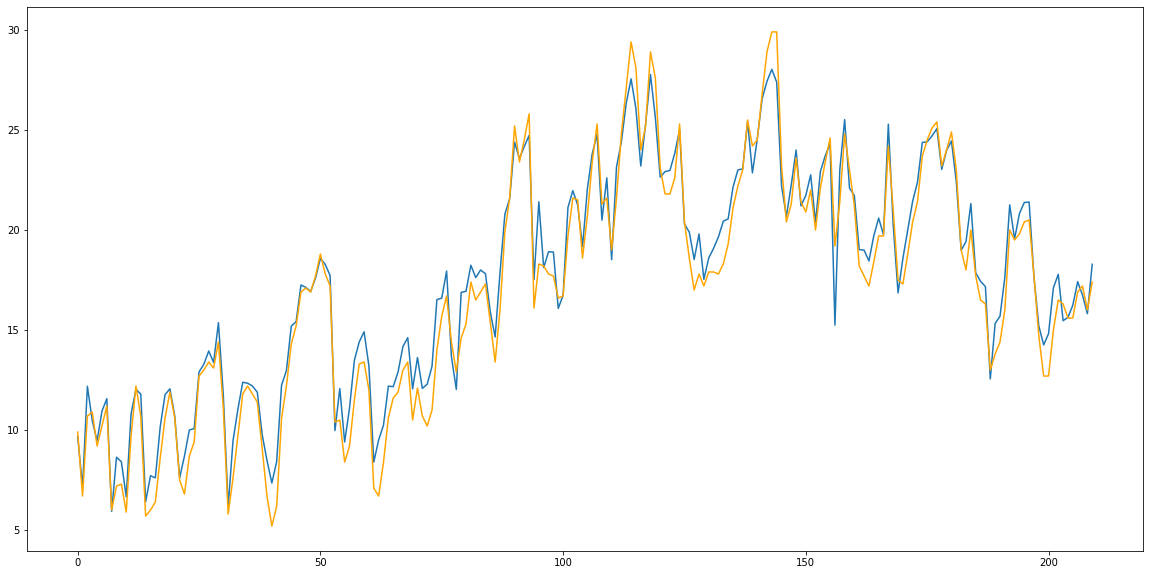

In [42]:
plt.plot(np.arange(len(yp)), yp)
plt.plot(np.arange(len(yt)), yt, c='orange')

plt.show()

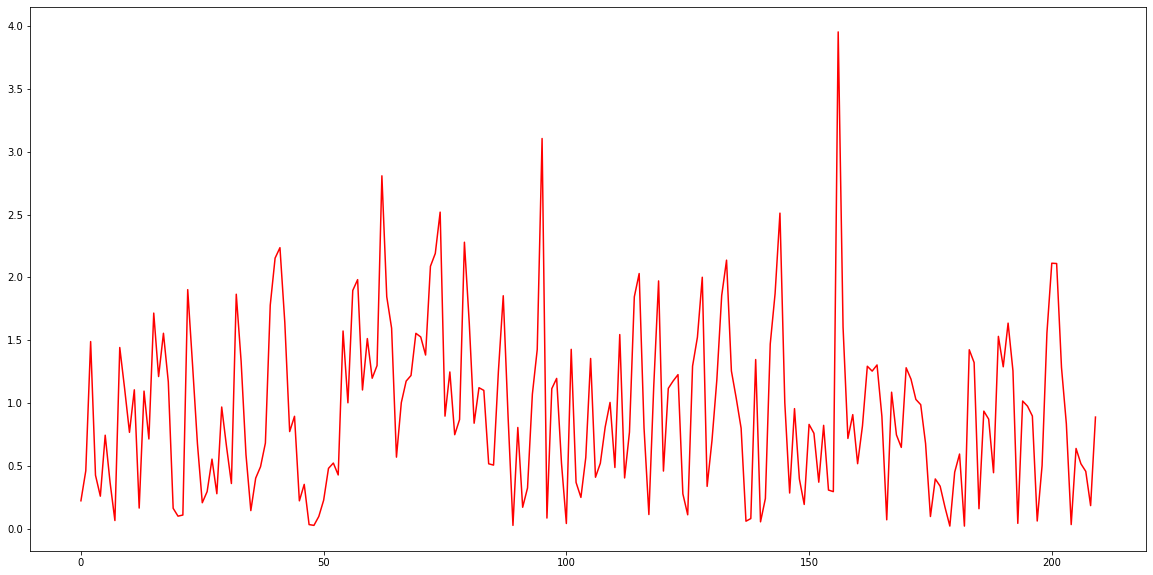

In [43]:
plt.plot(np.arange(len(yt)), np.abs(np.diff([yt, yp], axis=0)).ravel(), c='red')
plt.show()

In [44]:
print('Max abs error:', '%.10f' % np.max(np.abs(np.diff([yt, yp], axis=0).ravel())))
print('Min abs error:', '%.10f' % np.min(np.abs(np.diff([yt, yp], axis=0).ravel())))

Max abs error: 3.9552793091
Min abs error: 0.0192521726


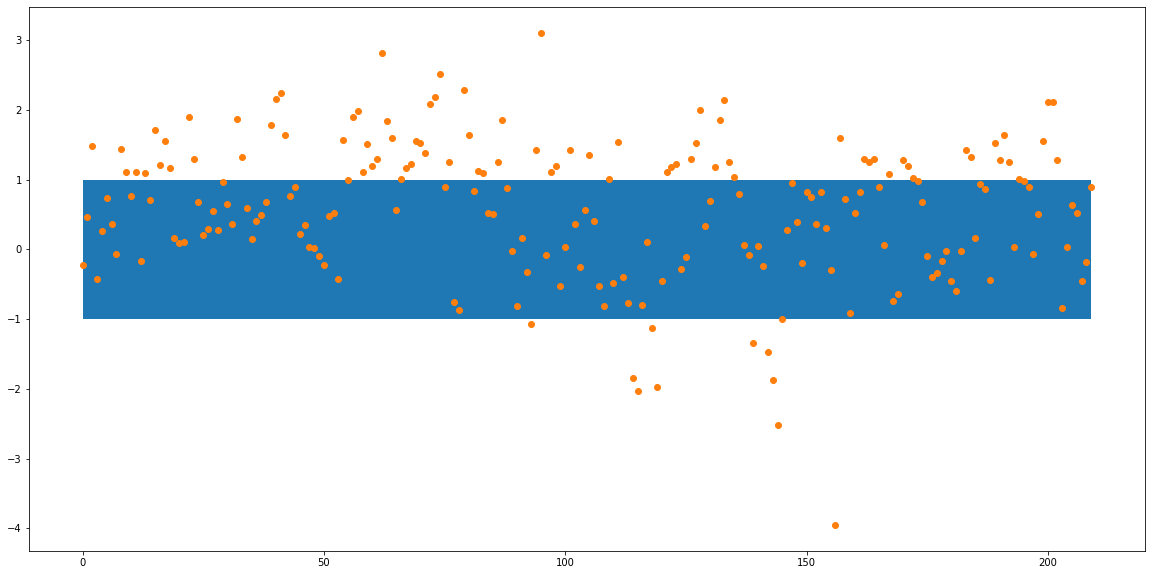

In [45]:
threshold = 1.0
plt.fill_between(np.arange(len(yp)), -threshold, threshold)
plt.scatter(np.arange(len(yp)), np.diff([yt, yp], axis=0))
plt.show()

In [46]:
ok_values = 0
bad_values = 0

diffs = np.diff([yt, yp], axis=0).ravel()
for i in diffs:
    if i <= threshold and i >= -threshold:
        ok_values = ok_values + 1
    else:
        bad_values = bad_values + 1

print('Threshold: +/-', threshold)
print('Amount of good values', ok_values)
print('Amount of bad values', bad_values)
print('Percentage good/bad:', ok_values / (ok_values + bad_values), '/', bad_values / (ok_values + bad_values))

Threshold: +/- 1.0
Amount of good values 117
Amount of bad values 93
Percentage good/bad: 0.5571428571428572 / 0.44285714285714284


In [47]:
ok_values = 0
bad_values = 0

diffs = np.diff([np.around(yt), np.around(yp)], axis=0).ravel()
for i in diffs:
    if i <= threshold and i >= -threshold:
        ok_values = ok_values + 1
    else:
        bad_values = bad_values + 1

print('Threshold: +/-', threshold)
print('Amount of good values', ok_values)
print('Amount of bad values', bad_values)
print('Percentage good/bad:', ok_values / (ok_values + bad_values), '/', bad_values / (ok_values + bad_values))

Threshold: +/- 1.0
Amount of good values 167
Amount of bad values 43
Percentage good/bad: 0.7952380952380952 / 0.20476190476190476


NameError: name 'x_test' is not defined